In [1]:
import missingno as msno
import pandas as pd
import numpy as np
import inflection
import math 
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.colors as mcolors
import seaborn as sns

%matplotlib inline


#Leitura dos dados

sales = pd.read_csv('train.csv')
print(sales.shape)
stores=pd.read_csv("store.csv")
print(stores.shape)
sales=sales.merge(stores, how="inner", on="Store")
print(sales.shape)

C:\Users\Lucas\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(1017209, 9)
(1115, 10)
(1017209, 18)


In [2]:
#Formatação dos nomes das colunas

oldCols=list(sales.columns)
snakecase=lambda x: inflection.underscore(x)
newCols=list(map(snakecase, oldCols))
#print(newCols)

sales.columns = newCols
sales.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   store                         1017209 non-null  int64  
 1   day_of_week                   1017209 non-null  int64  
 2   date                          1017209 non-null  object 
 3   sales                         1017209 non-null  int64  
 4   customers                     1017209 non-null  int64  
 5   open                          1017209 non-null  int64  
 6   promo                         1017209 non-null  int64  
 7   state_holiday                 1017209 non-null  object 
 8   school_holiday                1017209 non-null  int64  
 9   store_type                    1017209 non-null  object 
 10  assortment                    1017209 non-null  object 
 11  competition_distance          1014567 non-null  float64
 12  competition_open_since_month

In [4]:
sales.describe()

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [37]:
sales["date"]=pd.to_datetime(sales["date"]).dt.date
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 15 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   store                        1017209 non-null  int64  
 1   day_of_week                  1017209 non-null  int64  
 2   date                         1017209 non-null  object 
 3   sales                        1017209 non-null  int64  
 4   customers                    1017209 non-null  int64  
 5   open                         1017209 non-null  int64  
 6   promo                        1017209 non-null  int64  
 7   state_holiday                1017209 non-null  object 
 8   school_holiday               1017209 non-null  int64  
 9   store_type                   1017209 non-null  object 
 10  competition_distance         1017209 non-null  float64
 11  competition_open_since_year  1017209 non-null  float64
 12  promo2                       1017209 non-n

# Verificando informações ausentes na base de dados.

<AxesSubplot:>

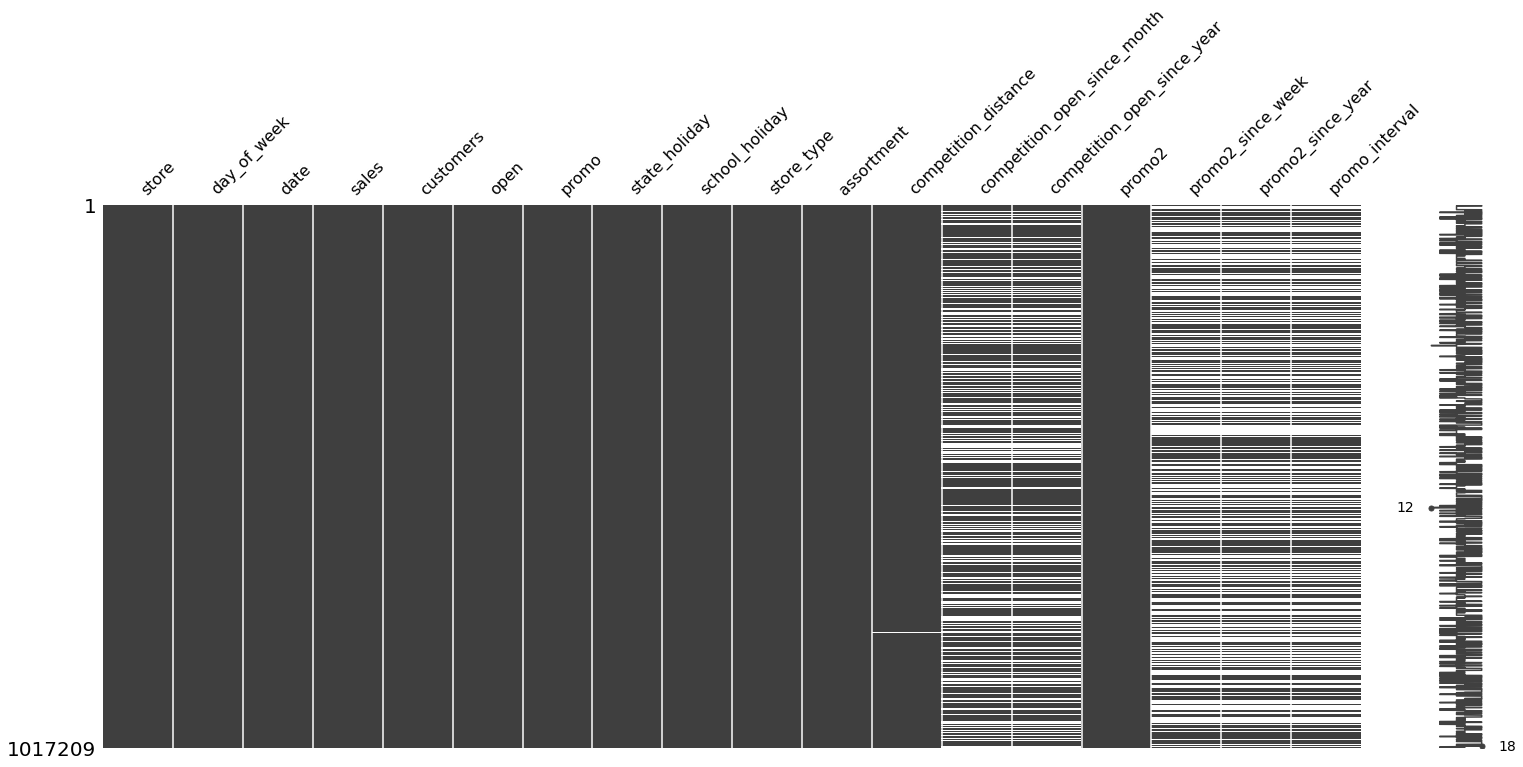

In [6]:
msno.matrix(sales)

# A base de dados informa se há feriado mas não especifica qual, somente usando letras a,b e c.. transformação realizada para um maior detalhamento dessa informação.

In [7]:
#a = public holiday, b = Easter holiday, c = Christmas, 0 = None
sales["state_holiday"].replace({"a": "public_holiday", "b": "easter_holiday", "c": "christmas", "0": "None", 0: "None"}, inplace=True)

sales.head(1000)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,1,5,2015-07-31,5263,555,1,1,None,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,None,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,None,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,None,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,None,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,1,2015-06-08,3918,501,1,0,None,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
996,2,7,2015-06-07,0,0,0,0,None,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
997,2,6,2015-06-06,2641,319,1,0,None,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
998,2,5,2015-06-05,4938,532,1,1,None,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


# Verificando quais colunas precisam de tratamento

In [8]:
sales.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

# Como não havia informação alguma de localização das lojas, presumi que as lojas que não tinham a informação sobre a distancia da concorrência deveriam receber o valor máximo presente na base de dados.


In [9]:
sales["competition_distance"].fillna(sales["competition_distance"].max(), inplace = True)

# Colunas excluídas por não haver maiores detalhes na base de dados.

In [10]:
sales.drop(["assortment", "competition_open_since_month"], axis=1, inplace=True)


# Dados ausentes tratados de maneira simples na coluna "Competição desde x ano", dados ausentes são substituidos pelo ano mínimo presente na base de dados.


In [11]:
sales.groupby("store")["date"].transform(lambda x: x.min().year)

0          2013
1          2013
2          2013
3          2013
4          2013
           ... 
1017204    2013
1017205    2013
1017206    2013
1017207    2013
1017208    2013
Name: date, Length: 1017209, dtype: int64

In [12]:
mask=sales["competition_open_since_year"].isna()
sales.loc[mask, 'competition_open_since_year'] = 2013

# Tratamento para outra coluna com poucos detalhes na base de dados.

In [13]:
sales['promo2_since_year'].replace(np.nan, 0, inplace=True)
sales['promo2_since_year'] = sales['promo2_since_year'].astype(np.int32)

sales["promo_interval"].replace(np.nan, "None", inplace=True)

#Mais uma coluna com poucos detalhes, decidido removê-la da base.

sales.drop(["promo2_since_week"], axis=1, inplace=True)
sales.isna().sum()


store                          0
day_of_week                    0
date                           0
sales                          0
customers                      0
open                           0
promo                          0
state_holiday                  0
school_holiday                 0
store_type                     0
competition_distance           0
competition_open_since_year    0
promo2                         0
promo2_since_year              0
promo_interval                 0
dtype: int64

# Base de dados após o tratamento da mesma.

<AxesSubplot:>

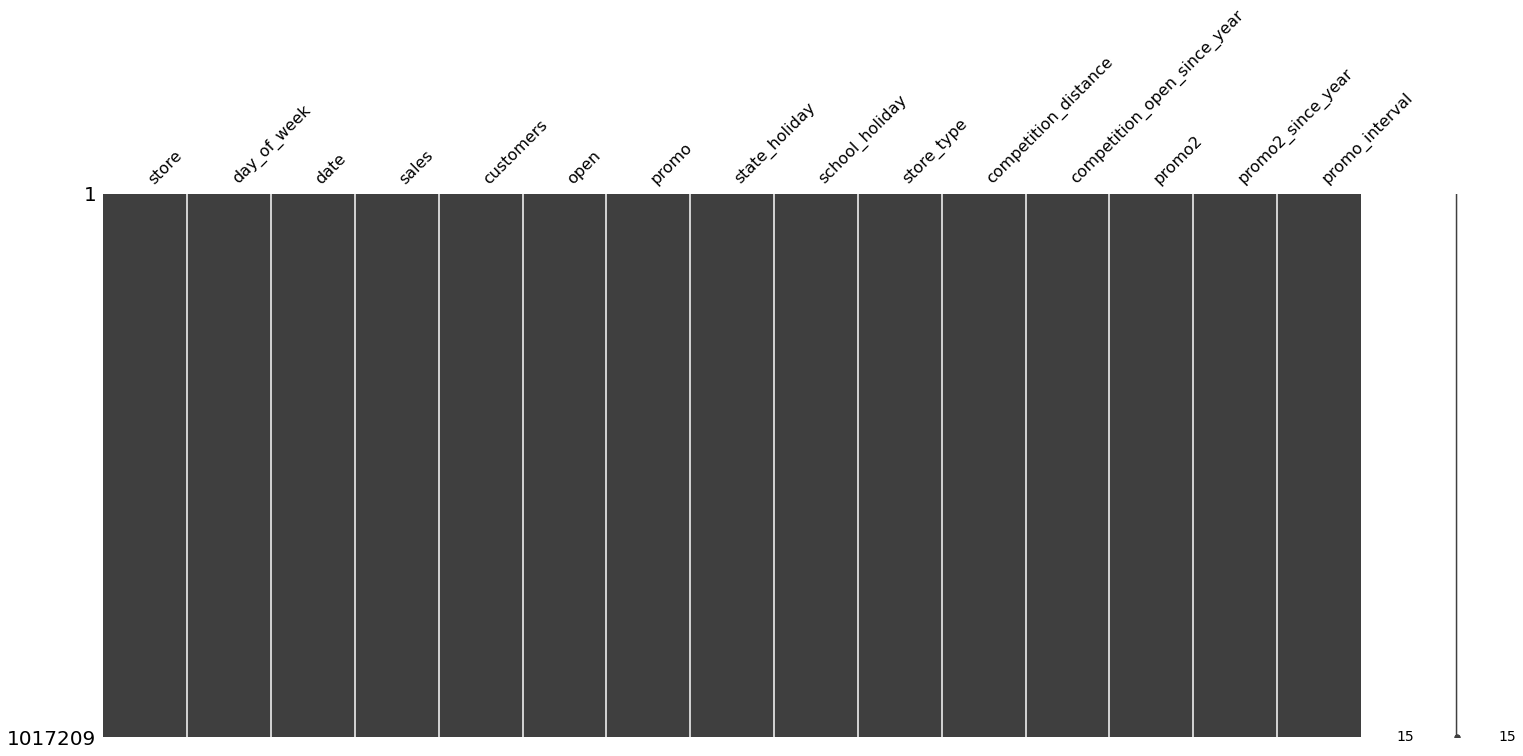

In [14]:
msno.matrix(sales)

# Questionamentos sobre a base de dados:

## Qual loja fez mais vendas?

In [15]:
sales.groupby("store")[["sales"]].sum().sort_values("sales", ascending=False).head(1)

,sales
store,
262,19516842


# Scatterplot das vendas por identificador da loja.

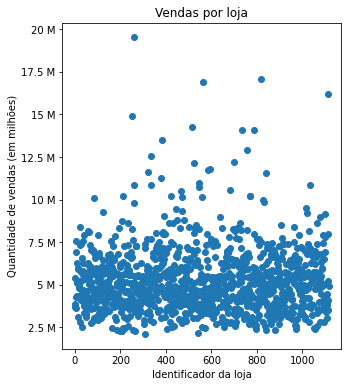

In [16]:
from matplotlib.ticker import EngFormatter
fig, ax=plt.subplots(figsize=(5, 6))
mean_cs = sales.pivot_table(index='store', values='sales', aggfunc='sum')
plt.scatter(mean_cs.index, mean_cs['sales']);
ax.set_title("Vendas por loja")
ax.set_ylabel("Quantidade de vendas (em milhões)")
ax.set_xlabel("Identificador da loja")
ax.yaxis.set_major_formatter(EngFormatter())
plt.show()

## TOP 5 de lojas sobre vendas.

C:\Users\Lucas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


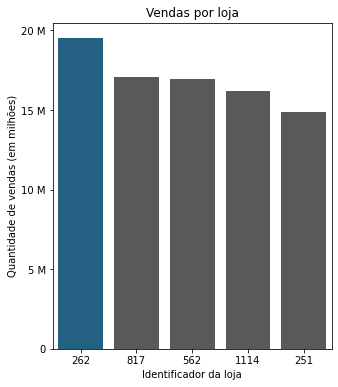

In [17]:
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import EngFormatter
fig, ax=plt.subplots(figsize=(5, 6))
df=sales.groupby("store")[["sales"]].sum().sort_values("sales", ascending=False).head(5)
cores=["#595959" for i in range(len(df))]
indexMaior=list(df.index).index(df.sales.idxmax())
cores[indexMaior]="#156590"
sns.barplot(df.index, df.sales, ci=None, estimator=sum, palette=cores, order=df.index)
ax.set_title("Vendas por loja")
ax.set_ylabel("Quantidade de vendas (em milhões)")
ax.set_xlabel("Identificador da loja")
ax.yaxis.set_major_formatter(EngFormatter())
ax.set_yticks(np.arange(0, 25000000, step=5000000));
plt.show()

# As piores 5 lojas em quesito vendas.

C:\Users\Lucas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


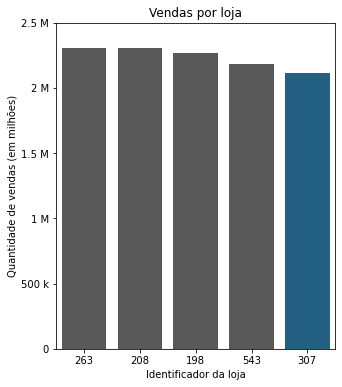

In [19]:
fig, ax=plt.subplots(figsize=(5, 6))
df=sales.groupby("store")[["sales"]].sum().sort_values("sales", ascending=False).tail(5)
cores=["#595959" for i in range(len(df))]
indexMenor=list(df.index).index(df.sales.idxmin())
cores[indexMenor]="#156590"
sns.barplot(df.index, df.sales, ci=None, estimator=sum, palette=cores, order=df.index)
ax.set_title("Vendas por loja")
ax.set_ylabel("Quantidade de vendas (em milhões)")
ax.set_xlabel("Identificador da loja")
ax.yaxis.set_major_formatter(EngFormatter())
ax.set_ylim(0, 2500000)
ax.set_yticks(np.arange(0, 3000000, step=500000))
plt.show()

# A loja com a maior média de clientes.

In [20]:
sales.groupby("store")[["customers"]].mean().sort_values("customers", ascending=False).iloc[0, :]
sales.groupby("store")[["customers"]].mean().sort_values("customers", ascending=False).head(1)

,customers
store,
733,3403.458599


# TOP 5 em média de clientes por loja (Lojas 262 e 562 presentes também no TOP 5 de vendas)

C:\Users\Lucas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


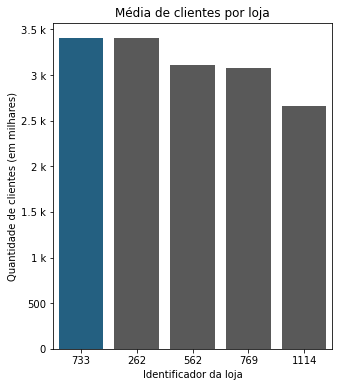

In [21]:
fig, ax=plt.subplots(figsize=(5, 6))
df=sales.groupby("store")[["customers"]].mean().sort_values("customers", ascending=False).head(5)
cores=["#595959" for i in range(len(df))]
index=list(df.index).index(df.customers.idxmax())
cores[index]="#156590"
sns.barplot(df.index, df.customers, ci=None, estimator=sum, palette=cores, order=df.index)
ax.set_title("Média de clientes por loja")
ax.set_ylabel("Quantidade de clientes (em milhares)")
ax.set_xlabel("Identificador da loja")
ax.yaxis.set_major_formatter(EngFormatter())
plt.show()

# 5 lojas com a menor média de clientes (307 também presente nas 5 piores no quesito vendas)

C:\Users\Lucas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


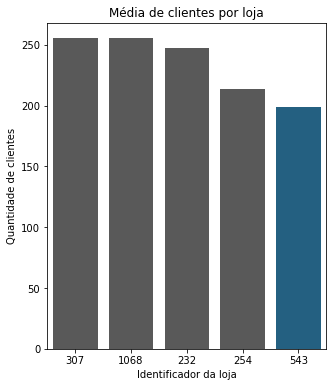

In [22]:
fig, ax=plt.subplots(figsize=(5, 6))
df=sales.groupby("store")[["customers"]].mean().sort_values("customers", ascending=False).tail(5)
cores=["#595959" for i in range(len(df))]
index=list(df.index).index(df.customers.idxmin())
cores[index]="#156590"
sns.barplot(df.index, df.customers, ci=None, estimator=sum, palette=cores, order=df.index)
ax.set_title("Média de clientes por loja")
ax.set_ylabel("Quantidade de clientes")
ax.set_xlabel("Identificador da loja")
ax.yaxis.set_major_formatter(EngFormatter())
plt.show()

# Média de clientes por loja.

In [23]:
sales.groupby("store")[["customers"]].mean()

,customers
store,
1,467.646497
2,486.045648
3,620.286624
4,1100.057325
5,444.360934
...,...
1111,373.548832
1112,693.498938
1113,596.763270


# Scatterplot da média de clientes por loja.

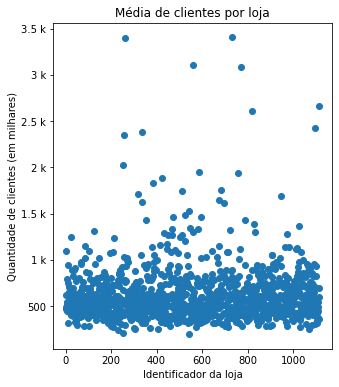

In [32]:
fig, ax=plt.subplots(figsize=(5, 6))
mean_cs = sales.pivot_table(index='store', values='customers', aggfunc='mean')
plt.scatter(mean_cs.index, mean_cs['customers']);
ax.set_title("Média de clientes por loja")
ax.set_ylabel("Quantidade de clientes (em milhares)")
ax.set_xlabel("Identificador da loja")
ax.yaxis.set_major_formatter(EngFormatter())
plt.show()

# Gráfico de dispersão (número de clientes x número de vendas). Outliers mínimos quase nulos.

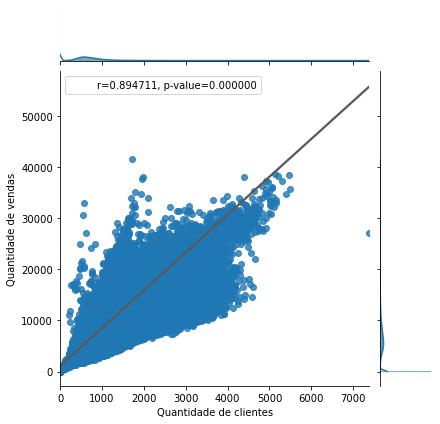

In [34]:
import scipy.stats as stats
g=sns.jointplot(x="customers", y="sales", data=sales, kind="reg", joint_kws={'line_kws':{'color':'#595959'}})
r, p=stats.pearsonr(sales.customers, sales.sales)
phantom,=g.ax_joint.plot([], [], linestyle="", alpha=0)
#g.ax_joint.set_title("Relação clientes x vendas")
g.ax_joint.set_ylabel("Quantidade de vendas")
g.ax_joint.set_xlabel("Quantidade de clientes")
g.ax_joint.legend([phantom],["r={:f}, p-value={:f}".format(r, p)])

# Qual loja passou mais dias com promoção ativa? (Múltiplos resultados)

In [35]:
sales.groupby("store")[["promo"]].sum().sort_values("promo",ascending=False).head(15)

,promo
store,
1,360
726,360
708,360
709,360
713,360
714,360
715,360
717,360
718,360


# Total de vendas por ano. PS: A base foi extraída em julho de 2015, portanto a discrepância se deve a falta de 5 meses de vendas.

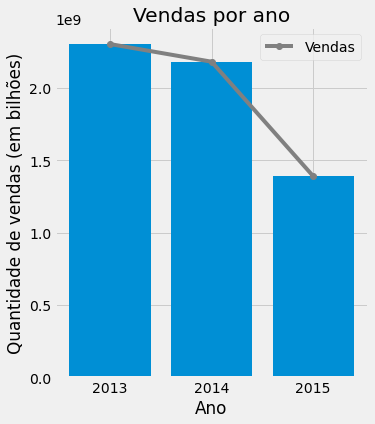

In [38]:
import matplotlib
matplotlib.style.use('fivethirtyeight')
fig, ax=plt.subplots(figsize=(5, 6))

sales["year"]=sales["date"].apply(lambda x: x.year)

df=sales.groupby('year')[['sales']].sum()
ax.bar(df.index, df.sales)
ax.plot(df.index, df.sales, linestyle='-', marker='o', color="gray")
ax.set_title("Vendas por ano")
ax.set_ylabel("Quantidade de vendas (em bilhões)")
ax.set_xlabel("Ano")
ax.set_xticks(np.arange(2013, 2016, step=1))
#ax.yaxis.set_major_formatter(EngFormatter())
ax.legend(["Vendas"])
plt.show()

# Média total de vendas mensais.

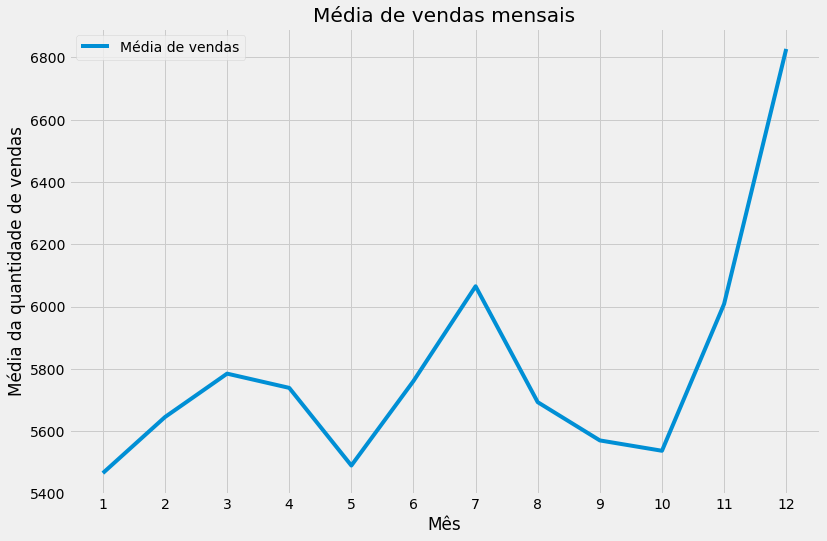

In [41]:
sales["month"]=sales["date"].apply(lambda x: x.month)

sales_year = sales.pivot_table(index='month', values='sales', aggfunc='mean') 

plt.figure(figsize=(12,8))

ax = sns.lineplot(x=sales_year.index, y=sales_year['sales'])
ax.legend(['Vendas'])
ax.set_title('Média de vendas mensais')
ax.set_ylabel('Média da quantidade de vendas')
ax.set_xlabel('Mês')
ax.legend(["Média de vendas"])
ax.set_xticks(np.arange(1, 13, step=1))
ax.set_label('');


# Qual dia da semana é mais provável de ocorrer uma promoção? (Dias 6 e 7 não há registro de promoção ativa.

In [42]:
sales.loc[sales['promo']==1, 'day_of_week'].value_counts()

1    77760
2    77580
3    77580
4    77580
5    77580
Name: day_of_week, dtype: int64

# Em qual feriado as vendas são maiores, natal ou páscoa?

In [43]:
mask=sales["state_holiday"].isin(["easter_holiday", "christmas"])
sales.loc[mask].groupby(['state_holiday', 'year'])[['sales']].sum().sort_values("sales", ascending=False).head(5)

sales
state_holiday  year        
easter_holiday 2015  515394
               2014  463353
               2013  454997
christmas      2014  360624
               2013  331182

# Maior número de vendas em um único mês.

In [45]:
sales.groupby(['year', 'month','store'])[['sales']].max().sort_values('sales',ascending=False).head(1)

,,,sales
year,month,store,
2015,6,909,41551


# Tem mais vendas/clientes com promoção ou sem promoção?

In [46]:
sales.groupby("promo")["sales", "customers"].mean()

<ipython-input-46-0ce15378dad9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales.groupby("promo")["sales", "customers"].mean()


,sales,customers
promo,,
0,4406.050805,517.823542
1,7991.152046,820.098815
